# Actividad

1. Elaborar un programa en python que permita calcular la integral de una función entre el intervalo a, b. para ello debera realizar lo siguiente:
En un notebook de collab:

* Deducir la ecuación general del metodo del trapecio.
Construir un funcion llamada integral_trapz que reciba como argumento una función y el intervalo a,
b.

* El numero de intervalos N será un argumento opcional, defina por defecto N=10. La función deberá retornar el valor de la integral.
Comparar la solución con la libreria de scipy https://docs.scipy.org/doc//scipy-


# Construir un programa en python con la función anterior que realice lo siguiente:

Generalice el programa para que la funcion pueda ser pasada como parametro en terminal, junto con el parametro a, b. la ejecucion debera ser: python integral func a b, Ejemplo de ejcucion: python x**2+1 1 5
Para pasar los parametros consulte la libreria sys de python.

In [ ]:
import scipy as sc
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Regla del Trapecio
\begin{equation}
\int_{a}^{b} f(x) dx = [f(a) + f(b) + \sum_{i = 1}^{n-1} f(x_{i} )] \frac{h}{2}
\end{equation}

In [ ]:
def integral_trapz(f,a,b,N):
  x = np.linspace(a,b,int(N))
  h = (b-a)/N
  A = (f(x[0]) + f(x[-1]) + 2*f(x[1:-1]).sum())*h*0.5
  return A


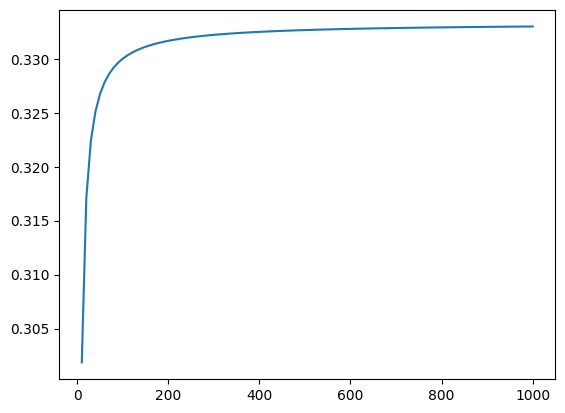

In [ ]:
f = lambda x : x**2
N = np.linspace(10,1000,100)
areas = np.zeros(len(N))

for i,n in enumerate(N):
  areas[i] = integral_trapz(f,0,1,n)
plt.plot(N,areas)

In [ ]:
# Derivada analitica de la funcion
x = sp.symbols('x')
h = lambda x : (pow((x-1),2)*(sp.sin(x)/3)) + 1

# Primera Derivada
h1 = sp.diff(h(x),x)

# Segunda Derivada
h2 = sp.diff(h1,x)

h2


-(x - 1)**2*sin(x)/3 + 2*(2*x - 2)*cos(x)/3 + 2*sin(x)/3

In [ ]:
F=sp.lambdify(x, h2, 'numpy')

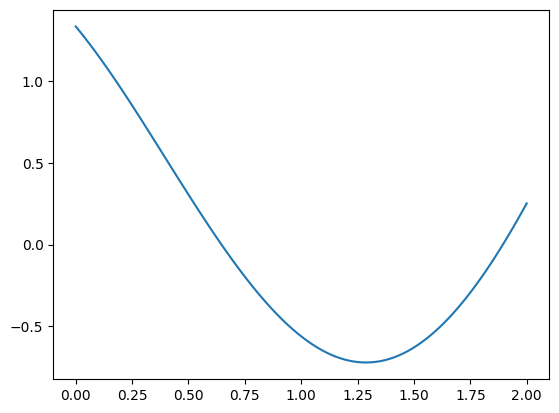

In [ ]:
# Grafica para determinar el Maximo de la funcion
x_= np.linspace(0, 2, 100)
plt.plot(x_,-F(x_))

In [ ]:
f=sp.lambdify(x, h2, 'numpy')

In [ ]:
# Deduccion de los valores de N para la cantidad de trapecios necesarios para resolver la integral
a = 0
b = 2
n=np.sqrt(((b-a)**3*F(1.25)) / 12E-3)
n

21.87835085394142

In [ ]:
f = lambda x : (((x-1)**2)*(np.sin(x)/3)) + 1

#integral_trapz(f,0,2,75)
x_ = np.linspace(a,b,21)

integral = np.trapz(f(x_),x_,21)
integral

2.134261710942007

In [ ]:
# conparacion de solucion de la integral con el metodo np.trapz
x_ = np.linspace(a,b,20000)
y_ = f(x_)

integral = np.trapz(y_,x_,20000)
integral

2.1341493391465427

# **Regla de Simpson**

\begin{equation}
\int_{a}^{b} f(x) dx = \frac{h}{3} [f(a)+2\sum_{j = 1}^{\frac{n}{2} - 1} f(x_{2j}) + 4 \sum_{j = 1}^{\frac{n}{2}} f(x_{2j - 1} ) +f(b)] -  \frac{b-a}{180} h^4\left(f^{(4)}(\mu )\right)                                                                                                     
\end{equation}

$h = \frac{b-a}{n}$

In [ ]:
def simp(f,a,b,n):

  x = np.linspace(a,b,n)
  h = x[1]-x[0]

  par = f(x[2:n-2:2]).sum()
  inp = f(x[1:n-1:2]).sum()

  integral = (h/3) * (f(a) + 2*par + 4*inp + f(b))

  return integral

i = simp(f,0,1,11)
i


1.0268678765113899

In [ ]:
# comparacion con la libreria de Simpson en scipy

x = np.linspace(0,1,1001)
sc.integrate.simpson(f(x),x,1001)


1.0268682039120898

In [ ]:
g = lambda x:np.cos(x*np.exp(x))
i = simp(g,0,np.pi/2,1001)
i



0.39641559446349717